## Regresión de tata_dataset con pandas y sklearn
Tata Consumer Products Limited, anteriormente Tata Global Beverages Limited, es una empresa multinacional india de bienes de consumo con sede en Kolkata, Bengala Occidental, India y una subsidiaria del Grupo Tata. En este programa se realizará y evaluará un modelo de regresión para predecir diferentes cantidades relacionadas con la venta de sus acciones, siendo estas: 

1. Día de venta de las acciones (Date)
2. Valor de apertura (Open)
3. Valor máximo (High)
4. Valor mínimo (Low)
5. Último valor vendido (Last)
6. Valor de cierre (Close)
7. Cantidad total vendida (Total Trade Quantity)
8. Número de acciones vendidas entre el precio promedio (Turnover)




In [144]:
%matplotlib inline
from string import ascii_letters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### Leer los datos

In [145]:
df_train = pd.read_csv("tata_train.csv")
df_test = pd.read_csv("tata_test.csv")

In [146]:
df_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [147]:
df_test.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


Veamos el mapa de correlación

### Acondicionar "Date"
Dado que Date es una fecha, sería más conveniente que tenga un valor numérico.

In [149]:
df_train["Date"] = pd.to_numeric(df_train.Date.str.replace('-',''))

In [150]:
df_test["Date"] = pd.to_numeric(df_test.Date.str.replace('-',''))

In [151]:
df_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,20180928,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,20180927,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,20180926,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,20180925,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,20180924,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [152]:
df_test.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,20181024,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,20181023,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,20181022,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,20181019,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,20181017,237.70,240.80,229.45,231.30,231.10,2945914,6961.65


### Histograma

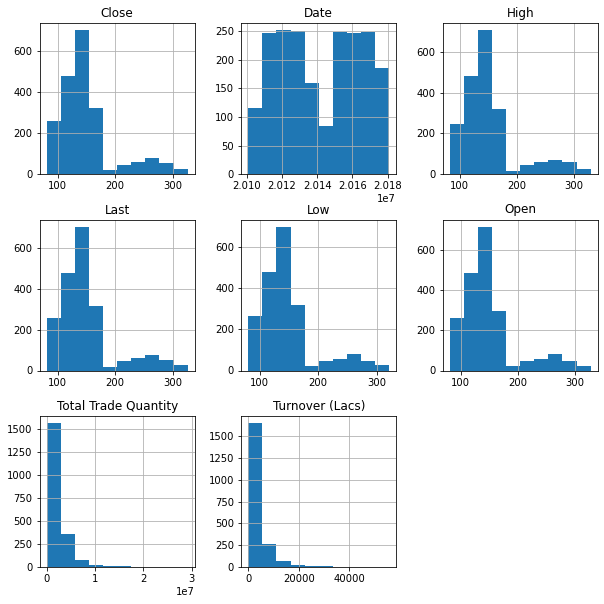

In [212]:
df_train.hist(figsize = (10,10))
plt.show()

### Mapa de correlación

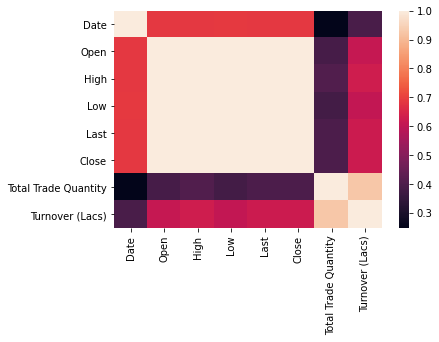

In [153]:
sns.heatmap(df_train.corr())
plt.show()

### Escoger características y salidas
Para este caso se escogerá el valor de apertura de la acción ("Open") como la variable a predecir

In [154]:
x_train = df_train.drop(["Open"], axis = 1)
x_test = df_test.drop(["Open"], axis = 1)

In [155]:
x_train.head()

,Date,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,20180928,235.95,230.20,233.50,233.75,3069914,7162.35
1,20180927,236.80,231.10,233.80,233.25,5082859,11859.95
2,20180926,240.00,232.50,235.00,234.25,2240909,5248.60
3,20180925,236.75,232.00,236.25,236.10,2349368,5503.90
4,20180924,239.20,230.75,234.00,233.30,3423509,7999.55


In [156]:
x_test.head()

,Date,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,20181024,221.25,217.05,219.55,219.80,2171956,4771.34
1,20181023,222.20,214.75,219.55,218.30,1416279,3092.15
2,20181022,231.60,222.00,223.05,223.25,3529711,8028.37
3,20181019,232.70,225.50,227.75,227.20,1527904,3490.78
4,20181017,240.80,229.45,231.30,231.10,2945914,6961.65


In [157]:
y_train = df_train.loc[:, ['Open']] #equivalente a y_train = df_train[['Open']]
y_test = df_test.loc[:, ['Open']]

In [158]:
y_train.head()

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55


In [159]:
y_test.head()

,Open
0,220.10
1,221.10
2,229.45
3,230.30
4,237.70


### Construcción del modelo
Para este caso debido a la sospecha de outliers en algunas partes de la data se opta por aplicar regularización L1 (Lasso) la cual penaliza la diferencia entre el outlier y la predicción

In [237]:
lin_reg = linear_model.Lasso(alpha = 0.1, max_iter = 5000)
lin_reg.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=5000)

### Predicción del modelo

In [238]:
y_predict = lin_reg.predict(x_test)
y_predict = pd.DataFrame(y_predict)

In [239]:
y_predict

,0
0,218.614291
1,218.650942
2,229.761423
3,230.674422
4,238.725420
5,235.818627
6,231.236939
7,229.610576
8,222.573748
9,220.083088


In [240]:
y_test

,Open
0,220.10
1,221.10
2,229.45
3,230.30
4,237.70
5,237.10
6,229.70
7,226.25
8,215.00
9,215.00


### Métricas

In [241]:
mean_squared_error(y_test, y_predict)

15.995503487333533

In [242]:
r2_score(y_test, y_predict)

0.7820453342337108